[Reference](https://medium.com/pythoneers/7-python-projects-that-made-my-portfolio-stand-out-instantly-c88f46719237)

# 1. Job Skills Highlighter


In [1]:
import re
def find_gaps(job_desc, resume):
    job_words = set(re.findall(r"\w+", job_desc.lower()))
    resume_words = set(re.findall(r"\w+", resume.lower()))
    return job_words - resume_words
jd = "Looking for Python, Django, AWS, SQL experience."
resume = "Experienced in Python and SQL."
print("Missing:", find_gaps(jd, resume))

Missing: {'django', 'for', 'looking', 'experience', 'aws'}


# 2. GitHub Timeline Dashboard

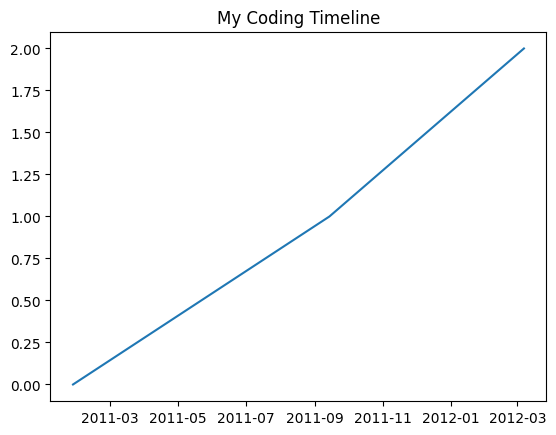

In [2]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
url = "https://api.github.com/repos/octocat/Hello-World/commits"
commits = requests.get(url).json()
dates = [datetime.fromisoformat(c['commit']['author']['date'][:-1]) for c in commits]
plt.plot(sorted(dates), range(len(dates)))
plt.title("My Coding Timeline")
plt.show()

# 3. Market Trend Scraper


In [3]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
skills = Counter()
html = requests.get("https://www.indeed.com/jobs?q=python+developer").text
soup = BeautifulSoup(html, "html.parser")
for post in soup.find_all("div", class_="job_seen_beacon"):
    text = post.get_text().lower()
    for skill in ["flask", "django", "sql", "aws", "docker"]:
        if skill in text: skills[skill] += 1
print(skills.most_common())

[]


# 4. Auto-Generated Portfolio Page


In [4]:
import requests
repos = requests.get("https://api.github.com/users/octocat/repos").json()
with open("portfolio.html", "w") as f:
    f.write("<h2>My Projects</h2><ul>")
    for r in repos:
        f.write(f"<li><a href='{r['html_url']}'>{r['name']}</a></li>")
    f.write("</ul>")

# 5. Salary Predictor Tool


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv("salary_data.csv")
X = df[["years_exp", "skills_count"]]
y = df["salary"]
model = LinearRegression().fit(X, y)
print("Predicted:", model.predict([[5, 7]])[0])

# 6. Interview Prep PDF


In [8]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=c25aaeaf694c9a1d72f7403368d6f3a292ff8281d0eb66252de909db2390f5b9
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [9]:
from fpdf import FPDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
for topic in ["Python basics", "SQL joins", "OOP"]:
    pdf.cell(200, 10, txt=topic, ln=True)
pdf.output("prep_notes.pdf")

''

# 7. Resume Scoring AI


In [11]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer("all-MiniLM-L6-v2")
job = open("job.txt").read()
resume = open("resume.txt").read()
score = util.cos_sim(model.encode(job), model.encode(resume))
print("Match Score:", round(score.item(), 2))